# Parameter Analysis
## Dataset: Movies and TV (Amazon Rating Data)

## Import the libraries

In [1]:
#Import all the necessary libraries and packages
from surprise import *
import pandas as pd
from surprise import accuracy
from surprise.model_selection.split import train_test_split
from surprise.model_selection import cross_validate, GridSearchCV
from random import sample
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
import sklearn
import math
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

## Read the dataset

In [2]:
#Read the dataset
df = pd.read_csv("Datasets/Movies_and_TV.csv",header=None)
df.columns = ["User","Item","Rating"]

In [3]:
df.describe()  #Display information about the dataset

,Rating
count,8.765568e+06
mean,4.233011e+00
std,1.221438e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


## Preprocessing
Convert the user id and item id from string format to integer format

In [4]:
user=df["User"]     #Read the users column

In [5]:
user=user.drop_duplicates()  #Delete the duplicate values

In [6]:
uid = [*range(1,len(user)+1)]   #Create a list of integers from 1 to length of unique users 

In [7]:
user_dict=dict(zip(user,uid))   #One on one map integer list and user list using dictionaries

In [8]:
x=[]
for i in df['User']:
    x.append(user_dict[i])       #For every user in dataset, create a list with the corresponding integer user id
len(x)

8765568

In [9]:
df.insert(1,"UID",x,True)    #Insert the integer list to the dataset

In [10]:
df=df.drop('User',axis=1)    #Delete the old string user column

In [11]:
item=df["Item"]           #Read the items column

In [12]:
item=item.drop_duplicates()     #Delete the duplicate values

In [13]:
iid = [*range(1,len(item)+1)]       #Create a list of integers from 1 to length of unique items

In [14]:
item_dict=dict(zip(item,iid))    #One on one map integer list and item list using dictionaries

In [15]:
x=[]
for i in df['Item']:
    x.append(item_dict[i])        #For every item in dataset, create a list with the corresponding integer item id
len(x)

8765568

In [16]:
df.insert(2,"IID",x,True)          #Insert the integer list to the dataset

In [17]:
df=df.drop('Item',axis=1)         #Delete the old string item column

In [18]:
df              #Display the dataset

,UID,IID,Rating
0,1,1,5.0
1,1,2,5.0
2,1,3,5.0
3,1,4,5.0
4,1,5,4.0
...,...,...,...
8765563,182030,171372,5.0
8765564,182030,48660,4.0
8765565,182031,3826084,1.0
8765566,182031,3826085,3.0


## Sampling
User Filtering

In [19]:
unique_users=df.drop_duplicates(subset=["UID"])            #Create a sample with only unique users
unique_users.count()

UID       182032
IID       182032
Rating    182032
dtype: int64

Random Sampling

In [20]:
sim_rand_df = df.sample(n=500000, random_state = 1)       #Create a sample by randomly picking records
sim_rand_df.head()

,UID,IID,Rating
920541,6244,614631,5.0
2833176,25805,293906,5.0
6866630,54965,3199551,4.0
5798832,48931,2786630,5.0
7788864,75,10301,5.0


Stratified Sampling

In [21]:
#Create a sample by using stratified sampling method
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=2, test_size=0.07, random_state=42)
for train_index, test_index in strat_split.split(df, df["Rating"]):
    strat_train_set = df.loc[train_index]
    strat_data = df.loc[test_index]
strat_data.count()

UID       613590
IID       613590
Rating    613590
dtype: int64

## Graph Functions
Line Graph

In [23]:
# Function for line graphs
def plot_graph(factor_list,accuracy_list,xlabel,ylabel,title):
    plt.plot(factors_list,accuracy_list)     #Plot the graph
    plt.xlabel(xlabel)               #x-axis label
    plt.ylabel(ylabel)               #y-axis label
    plt.title(title)                 #Title of the graph
    plt.show()

Bar Graph

In [24]:
# Function for bar graphs
def plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg):
    x = np.arange(len(dataset_labels))
    width=0.2
    fig, ax = plt.subplots()
    rmse_bar = ax.bar(x - width/2, rmse_avg, width, label='RMSE')    #Create bar plots
    mse_bar = ax.bar(x + width/2, mse_avg, width, label='MSE')       #Create bar plots
    mae_bar = ax.bar(x + 1.5*width, mae_avg, width, label='MAE')     #Create bar plots
    ax.set_ylabel('Accuracy Scores')            #Set the y-axis label
    ax.set_title('Scores by Sample')            #Set the title
    ax.set_xticks(x)                            #Set the x-axis spread
    ax.set_xticklabels(dataset_labels)          #Set the x-axis labels
    ax.legend()
    fig.tight_layout()
    plt.show()

## Model, Prediction and Evaluation

In [25]:
dataset_list=[sim_rand_df,unique_users,strat_data]      #List of samples
dataset_labels=["Simple Random Sample", "Unique Users Sample", "Stratified Sample"]    #List of sample names
reader = Reader(rating_scale=(0,5))    #Create reader variable

SVD Algorithm

Simple Random Sample
10
RMSE: 1.1289
MSE: 1.2744
MAE:  0.8447
20
RMSE: 1.1291
MSE: 1.2748
MAE:  0.8452
30
RMSE: 1.1295
MSE: 1.2759
MAE:  0.8455
40
RMSE: 1.1293
MSE: 1.2754
MAE:  0.8456
50
RMSE: 1.1299
MSE: 1.2766
MAE:  0.8464
60
RMSE: 1.1303
MSE: 1.2776
MAE:  0.8470
70
RMSE: 1.1308
MSE: 1.2786
MAE:  0.8475
80
RMSE: 1.1303
MSE: 1.2775
MAE:  0.8470
90
RMSE: 1.1313
MSE: 1.2798
MAE:  0.8478
100
RMSE: 1.1314
MSE: 1.2800
MAE:  0.8485
110
RMSE: 1.1315
MSE: 1.2803
MAE:  0.8487
120
RMSE: 1.1312
MSE: 1.2795
MAE:  0.8486
130
RMSE: 1.1324
MSE: 1.2823
MAE:  0.8495
140
RMSE: 1.1319
MSE: 1.2812
MAE:  0.8491
150
RMSE: 1.1318
MSE: 1.2809
MAE:  0.8492
160
RMSE: 1.1323
MSE: 1.2822
MAE:  0.8502
170
RMSE: 1.1328
MSE: 1.2832
MAE:  0.8505
180
RMSE: 1.1337
MSE: 1.2852
MAE:  0.8514
190
RMSE: 1.1334
MSE: 1.2846
MAE:  0.8518
200
RMSE: 1.1340
MSE: 1.2860
MAE:  0.8523
210
RMSE: 1.1344
MSE: 1.2869
MAE:  0.8525
220
RMSE: 1.1347
MSE: 1.2875
MAE:  0.8531
230
RMSE: 1.1350
MSE: 1.2883
MAE:  0.8533
240
RMSE: 1.1343
MSE: 

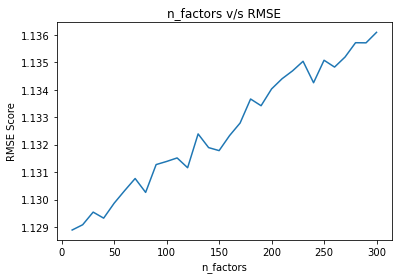

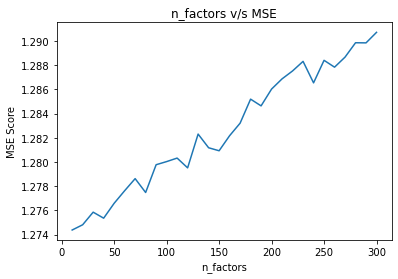

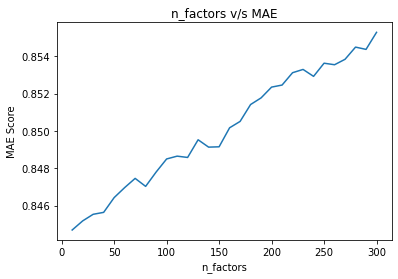

Unique Users Sample
10
RMSE: 1.4195
MSE: 2.0149
MAE:  1.1489
20
RMSE: 1.4195
MSE: 2.0151
MAE:  1.1490
30
RMSE: 1.4196
MSE: 2.0153
MAE:  1.1491
40
RMSE: 1.4197
MSE: 2.0156
MAE:  1.1492
50
RMSE: 1.4197
MSE: 2.0157
MAE:  1.1493
60
RMSE: 1.4198
MSE: 2.0159
MAE:  1.1495
70
RMSE: 1.4200
MSE: 2.0164
MAE:  1.1496
80
RMSE: 1.4200
MSE: 2.0163
MAE:  1.1498
90
RMSE: 1.4201
MSE: 2.0167
MAE:  1.1498
100
RMSE: 1.4203
MSE: 2.0171
MAE:  1.1501
110
RMSE: 1.4203
MSE: 2.0173
MAE:  1.1502
120
RMSE: 1.4203
MSE: 2.0173
MAE:  1.1502
130
RMSE: 1.4206
MSE: 2.0180
MAE:  1.1504
140
RMSE: 1.4205
MSE: 2.0178
MAE:  1.1505
150
RMSE: 1.4206
MSE: 2.0182
MAE:  1.1507
160
RMSE: 1.4207
MSE: 2.0185
MAE:  1.1507
170
RMSE: 1.4208
MSE: 2.0188
MAE:  1.1509
180
RMSE: 1.4209
MSE: 2.0189
MAE:  1.1509
190
RMSE: 1.4211
MSE: 2.0194
MAE:  1.1512
200
RMSE: 1.4212
MSE: 2.0197
MAE:  1.1513
210
RMSE: 1.4212
MSE: 2.0199
MAE:  1.1514
220
RMSE: 1.4212
MSE: 2.0198
MAE:  1.1513
230
RMSE: 1.4212
MSE: 2.0197
MAE:  1.1512
240
RMSE: 1.4215
MSE: 2

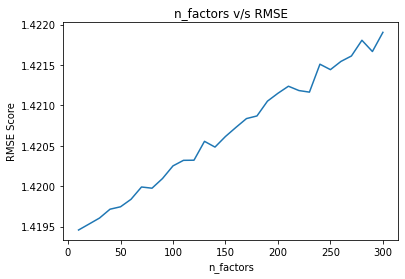

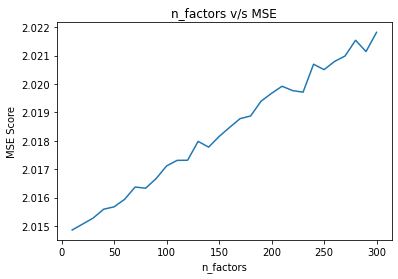

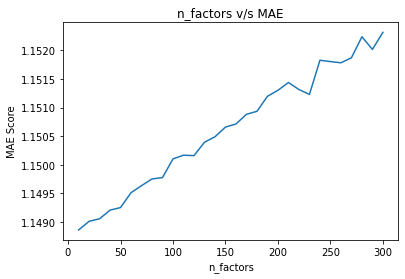

Stratified Sample
10
RMSE: 1.1208
MSE: 1.2561
MAE:  0.8368
20
RMSE: 1.1210
MSE: 1.2568
MAE:  0.8373
30
RMSE: 1.1215
MSE: 1.2578
MAE:  0.8379
40
RMSE: 1.1220
MSE: 1.2588
MAE:  0.8382
50
RMSE: 1.1218
MSE: 1.2585
MAE:  0.8384
60
RMSE: 1.1223
MSE: 1.2597
MAE:  0.8388
70
RMSE: 1.1231
MSE: 1.2614
MAE:  0.8397
80
RMSE: 1.1229
MSE: 1.2610
MAE:  0.8398
90
RMSE: 1.1233
MSE: 1.2617
MAE:  0.8404
100
RMSE: 1.1235
MSE: 1.2622
MAE:  0.8404
110
RMSE: 1.1237
MSE: 1.2627
MAE:  0.8409
120
RMSE: 1.1237
MSE: 1.2627
MAE:  0.8409
130
RMSE: 1.1249
MSE: 1.2654
MAE:  0.8424
140
RMSE: 1.1245
MSE: 1.2645
MAE:  0.8420
150
RMSE: 1.1248
MSE: 1.2652
MAE:  0.8422
160
RMSE: 1.1259
MSE: 1.2676
MAE:  0.8437
170
RMSE: 1.1253
MSE: 1.2664
MAE:  0.8425
180
RMSE: 1.1253
MSE: 1.2663
MAE:  0.8428
190
RMSE: 1.1258
MSE: 1.2674
MAE:  0.8439
200
RMSE: 1.1261
MSE: 1.2680
MAE:  0.8443
210
RMSE: 1.1269
MSE: 1.2700
MAE:  0.8448
220
RMSE: 1.1266
MSE: 1.2692
MAE:  0.8448
230
RMSE: 1.1272
MSE: 1.2707
MAE:  0.8451
240
RMSE: 1.1267
MSE: 1.2

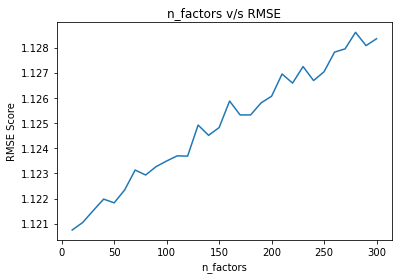

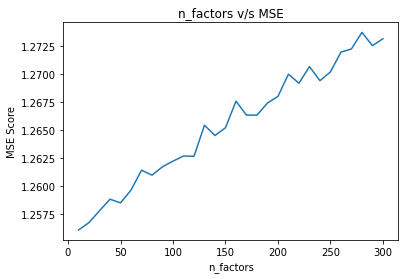

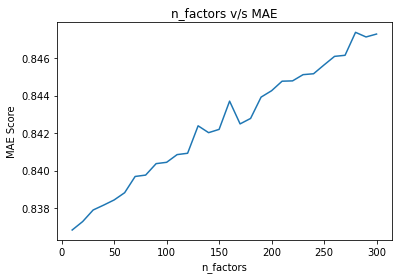

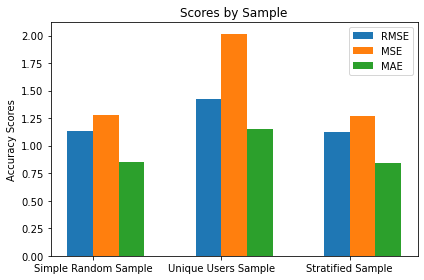

In [26]:
index=0
rmse_avg=[]              #Create empty lists to store the average metric values
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:                #For every sample
    print(dataset_labels[index])
    index=index+1
    data=Dataset.load_from_df(dataset,reader)
    train_df, test_df = train_test_split(data, test_size=0.1,shuffle=False)         #Split the sample to train and test data
    factors_list=[*range(10,310,10)]              #List of parameter values to test on
    mse_list=[]
    rmse_list=[]                 #Create empty lists to store the metric values for each sample
    mae_list=[]
    for i in factors_list:       #For all parameter values
        print(i)
        svd_algo = SVD(n_factors=i)            #Create the model instance
        svd_algo.fit(train_df)                 #Train the model                        
        prediction = svd_algo.test(test_df)    #Test the model
        rmse_list.append(accuracy.rmse(prediction,verbose=True))         
        mse_list.append(accuracy.mse(prediction,verbose=True))              #Append the metric values to the corresponding list
        mae_list.append(accuracy.mae(prediction,verbose=True))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))         #Find the average and append to the average list
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"n_factors","RMSE Score","n_factors v/s RMSE")
    plot_graph(factors_list,mse_list,"n_factors","MSE Score","n_factors v/s MSE")      #Plot the line graphs
    plot_graph(factors_list,mae_list,"n_factors","MAE Score","n_factors v/s MAE")

plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)           #Plot the bar graph

NMF Algorithm

Simple Random Sample
10
RMSE: 1.2987
MSE: 1.6866
MAE:  1.0304
20
RMSE: 1.2498
MSE: 1.5621
MAE:  0.9684
30
RMSE: 1.2372
MSE: 1.5306
MAE:  0.9429
40
RMSE: 1.2337
MSE: 1.5220
MAE:  0.9298
50
RMSE: 1.2343
MSE: 1.5236
MAE:  0.9239
60
RMSE: 1.2350
MSE: 1.5253
MAE:  0.9214
70
RMSE: 1.2360
MSE: 1.5277
MAE:  0.9206
80
RMSE: 1.2373
MSE: 1.5308
MAE:  0.9198
90
RMSE: 1.2388
MSE: 1.5346
MAE:  0.9198
100
RMSE: 1.2391
MSE: 1.5354
MAE:  0.9198
110
RMSE: 1.2400
MSE: 1.5375
MAE:  0.9199
120
RMSE: 1.2403
MSE: 1.5384
MAE:  0.9198
130
RMSE: 1.2413
MSE: 1.5409
MAE:  0.9200
140
RMSE: 1.2416
MSE: 1.5416
MAE:  0.9197
150
RMSE: 1.2422
MSE: 1.5431
MAE:  0.9199
160
RMSE: 1.2426
MSE: 1.5440
MAE:  0.9198
170
RMSE: 1.2430
MSE: 1.5451
MAE:  0.9201
180
RMSE: 1.2434
MSE: 1.5459
MAE:  0.9203
190
RMSE: 1.2436
MSE: 1.5465
MAE:  0.9201
200
RMSE: 1.2440
MSE: 1.5477
MAE:  0.9202
210
RMSE: 1.2441
MSE: 1.5479
MAE:  0.9202
220
RMSE: 1.2444
MSE: 1.5485
MAE:  0.9202
230
RMSE: 1.2446
MSE: 1.5490
MAE:  0.9202
240
RMSE: 1.2448
MSE: 

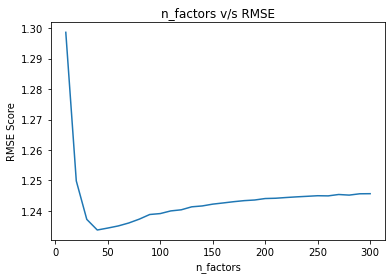

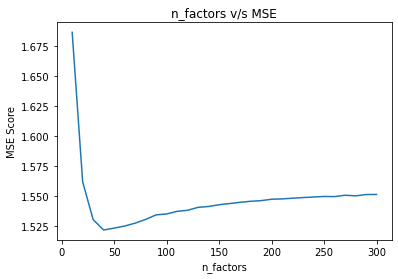

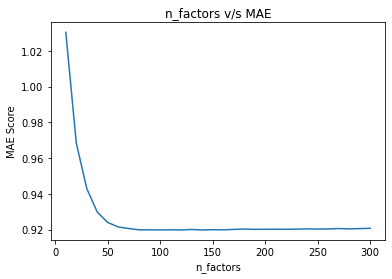

Unique Users Sample
10
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
20
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
30
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
40
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
50
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
60
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
70
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
80
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
90
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
100
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
110
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
120
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
130
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
140
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
150
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
160
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
170
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
180
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
190
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
200
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
210
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
220
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
230
RMSE: 1.4424
MSE: 2.0804
MAE:  1.1724
240
RMSE: 1.4424
MSE: 2

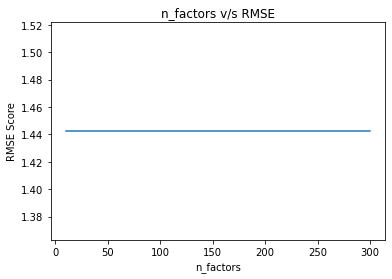

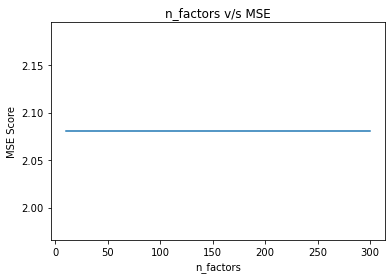

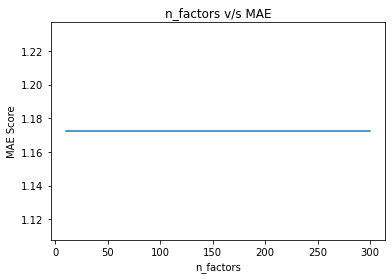

Stratified Sample
10
RMSE: 1.3016
MSE: 1.6942
MAE:  1.0333
20
RMSE: 1.2479
MSE: 1.5571
MAE:  0.9673
30
RMSE: 1.2322
MSE: 1.5183
MAE:  0.9353
40
RMSE: 1.2298
MSE: 1.5123
MAE:  0.9226
50
RMSE: 1.2303
MSE: 1.5135
MAE:  0.9167
60
RMSE: 1.2318
MSE: 1.5174
MAE:  0.9151
70
RMSE: 1.2328
MSE: 1.5199
MAE:  0.9131
80
RMSE: 1.2341
MSE: 1.5230
MAE:  0.9123
90
RMSE: 1.2355
MSE: 1.5264
MAE:  0.9123
100
RMSE: 1.2363
MSE: 1.5285
MAE:  0.9115
110
RMSE: 1.2373
MSE: 1.5309
MAE:  0.9118
120
RMSE: 1.2383
MSE: 1.5334
MAE:  0.9120
130
RMSE: 1.2390
MSE: 1.5352
MAE:  0.9118
140
RMSE: 1.2395
MSE: 1.5363
MAE:  0.9118
150
RMSE: 1.2401
MSE: 1.5380
MAE:  0.9120
160
RMSE: 1.2406
MSE: 1.5391
MAE:  0.9119
170
RMSE: 1.2410
MSE: 1.5401
MAE:  0.9119
180
RMSE: 1.2414
MSE: 1.5411
MAE:  0.9121
190
RMSE: 1.2420
MSE: 1.5426
MAE:  0.9122
200
RMSE: 1.2419
MSE: 1.5423
MAE:  0.9119
210
RMSE: 1.2424
MSE: 1.5436
MAE:  0.9120
220
RMSE: 1.2426
MSE: 1.5440
MAE:  0.9121
230
RMSE: 1.2429
MSE: 1.5448
MAE:  0.9121
240
RMSE: 1.2431
MSE: 1.5

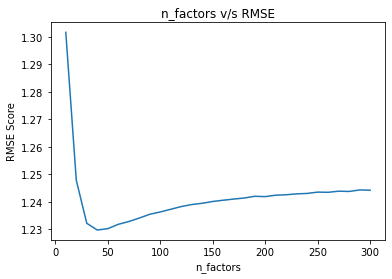

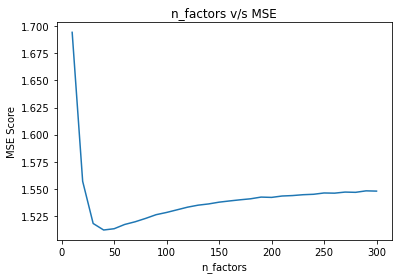

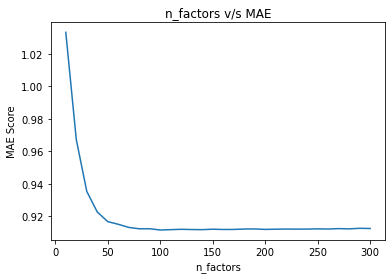

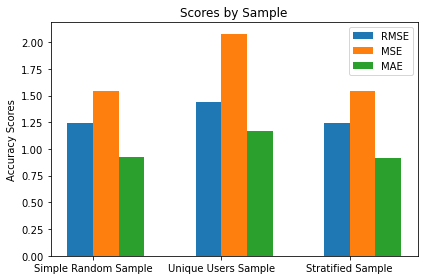

In [27]:
index=0
rmse_avg=[]           #Create empty lists to store the average metric values    
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:                   #For every sample
    print(dataset_labels[index])
    index=index+1
    data=Dataset.load_from_df(dataset,reader)
    train_df, test_df = train_test_split(data, test_size=0.1,shuffle=False)           #Split the sample to train and test data
    factors_list=[*range(10,310,10)]             #List of parameter values to test on
    mse_list=[]
    rmse_list=[]                             #Create empty lists to store the metric values for each sample
    mae_list=[]
    for i in factors_list:               #For all parameter values
        print(i)
        nmf_algo = NMF(n_factors=i)     #Create the model instance
        nmf_algo.fit(train_df)          #Train the model                               
        prediction = nmf_algo.test(test_df)            #Test the model
        rmse_list.append(accuracy.rmse(prediction,verbose=True))
        mse_list.append(accuracy.mse(prediction,verbose=True))            #Append the metric values to the corresponding list
        mae_list.append(accuracy.mae(prediction,verbose=True))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))          #Find the average and append to the average list
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"n_factors","RMSE Score","n_factors v/s RMSE")
    plot_graph(factors_list,mse_list,"n_factors","MSE Score","n_factors v/s MSE")           #Plot the line graphs
    plot_graph(factors_list,mae_list,"n_factors","MAE Score","n_factors v/s MAE")
    '''include bar graph'''
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)           #Plot the bar graph

Decision Tree Algorithm

Simple Random Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


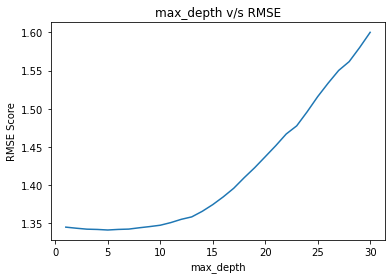

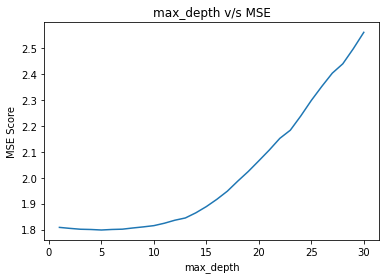

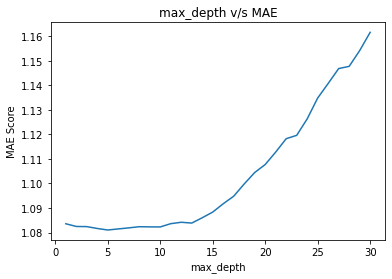

Unique Users Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


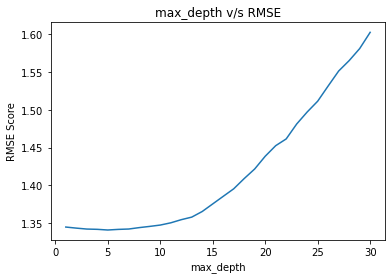

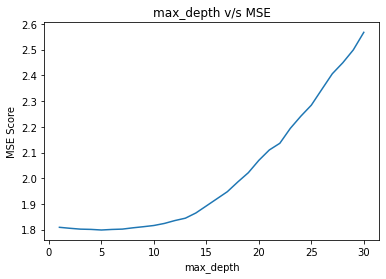

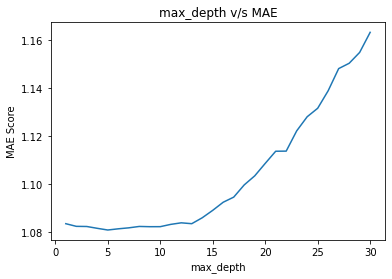

Stratified Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


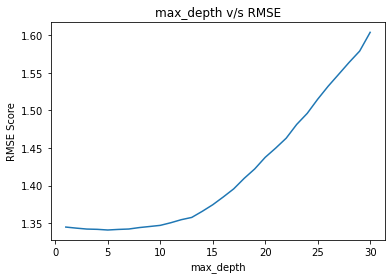

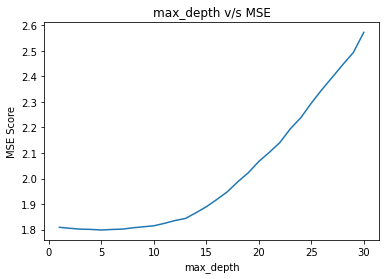

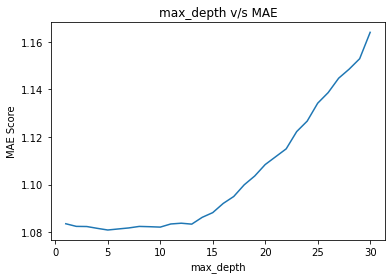

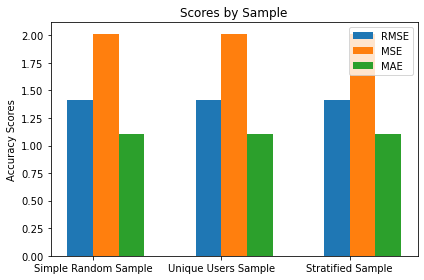

In [28]:
index=0
rmse_avg=[]           #Create empty lists to store the average metric values
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:                 #For every sample
    print(dataset_labels[index])
    index=index+1
    X = unique_users.drop(columns=['Rating'])
    y = unique_users['Rating']
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)   #Split the sample to train and test data  
    factors_list=[*range(1,31,1)]     #List of parameter values to test on
    mse_list=[]
    rmse_list=[]                          #Create empty lists to store the metric values for each sample
    mae_list=[]
    for i in factors_list:                #For all parameter values
        print(i)
        regr = DecisionTreeRegressor(max_depth=i)     #Create the model instance
        regr.fit(X_train, y_train)                    #Train the model
        y_pred = regr.predict(X_test)                 #Test the model
        rmse_list.append(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        mse_list.append(metrics.mean_squared_error(y_test, y_pred))                   #Append the metric values to the corresponding list
        mae_list.append(metrics.mean_absolute_error(y_test, y_pred))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))             #Find the average and append to the average list
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"max_depth","RMSE Score","max_depth v/s RMSE")
    plot_graph(factors_list,mse_list,"max_depth","MSE Score","max_depth v/s MSE")             #Plot the line graphs
    plot_graph(factors_list,mae_list,"max_depth","MAE Score","max_depth v/s MAE")
    
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)               #Plot the bar graph

Random Forest Algorithm

Simple Random Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


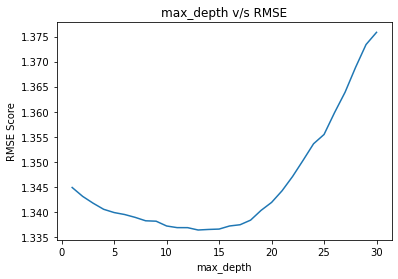

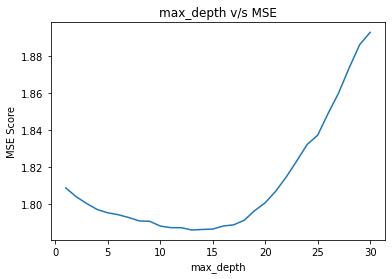

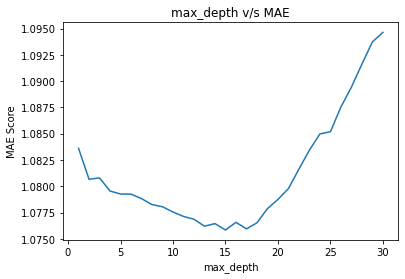

Unique Users Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


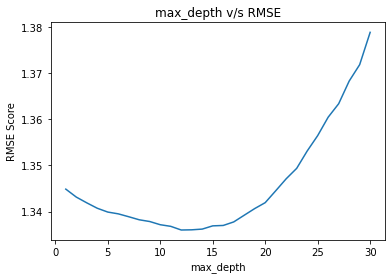

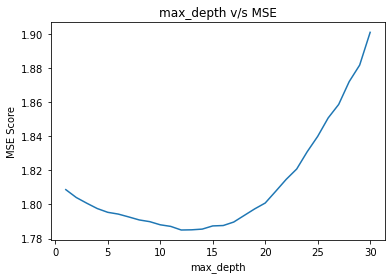

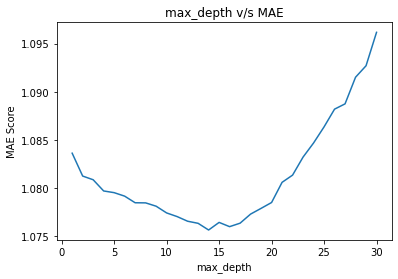

Stratified Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


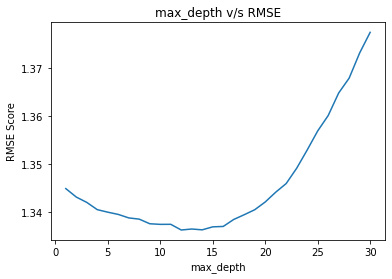

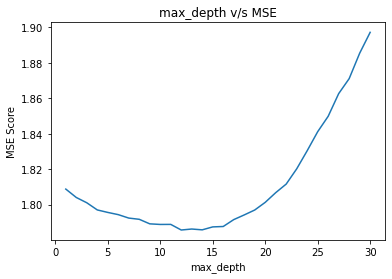

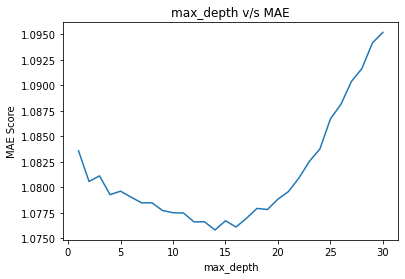

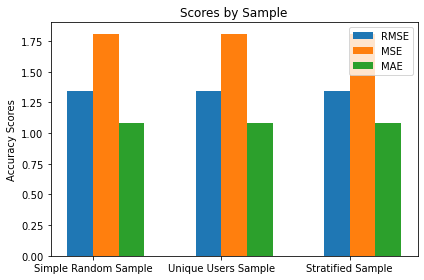

In [29]:
index=0
rmse_avg=[]            #Create empty lists to store the average metric values
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:                 #For every sample
    print(dataset_labels[index])
    index=index+1
    X = unique_users.drop(columns=['Rating'])
    y = unique_users['Rating']
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)           #Split the sample to train and test data  
    factors_list=[*range(1,31,1)]           #List of parameter values to test on
    mse_list=[]
    rmse_list=[]                    #Create empty lists to store the metric values for each sample
    mae_list=[]
    for i in factors_list:         #For all parameter values
        print(i)
        regrRandom = RandomForestRegressor(max_depth=i)         #Create the model instance
        regrRandom.fit(X_train, y_train)                        #Train the model
        y_predR = regrRandom.predict(X_test)                    #Test the model
        rmse_list.append(math.sqrt(metrics.mean_squared_error(y_test, y_predR)))
        mse_list.append(metrics.mean_squared_error(y_test, y_predR))           #Append the metric values to the corresponding list
        mae_list.append(metrics.mean_absolute_error(y_test, y_predR))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))          #Find the average and append to the average list
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"max_depth","RMSE Score","max_depth v/s RMSE")
    plot_graph(factors_list,mse_list,"max_depth","MSE Score","max_depth v/s MSE")               #Plot the line graphs
    plot_graph(factors_list,mae_list,"max_depth","MAE Score","max_depth v/s MAE")
    
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)                 #Plot the bar graph